$$ \Huge Perceptron ~ Learning ~ Algorithm $$
$$Minh ~ Kha$$

In [1]:
%matplotlib inline

In [2]:
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("handwritten/train.csv")
test  = pd.read_csv("handwritten/test.csv")

print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns


### Filter zero and one digit in train data

In [5]:
train = train.loc[train.label <= 1]
print(train.shape)

(8816, 785)


### Replace label of zero digits to -1

In [6]:
train.loc[train['label'] == 0, 'label'] = -1
print(train)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1         -1       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
4         -1       0       0       0       0       0       0       0       0   
5         -1       0       0       0       0       0       0       0       0   
12         1       0       0       0       0       0       0       0       0   
15         1       0       0       0       0       0       0       0       0   
17        -1       0       0       0       0       0       0       0       0   
23        -1       0       0       0       0       0       0       0       0   
35         1       0       0       0       0       0       0       0       0   
37         1       0       0       0       0       0       0       0       0   
38         1       0       0       0    

### Divide the train data into two set: 80% for training_set, 10% for validation_set

In [12]:
training_set, validation_set = train_test_split(train, train_size=0.8, test_size=0.2, shuffle=True)
print(training_set.shape)
print(validation_set.shape)

(7052, 785)
(1764, 785)


In [15]:
trainlabels = np.asmatrix(training_set.loc[:, 'label'])
traindata = np.asmatrix(training_set.loc[:,'pixel0':])
print(trainlabels.shape)
print(traindata.shape)

(1, 7052)
(7052, 784)


In [16]:
validation_labels = np.asmatrix(validation_set.loc[:, 'label'])
validation_data = np.asmatrix(validation_set.loc[:, 'pixel0':])
print(validation_labels.shape)
print(validation_data.shape)

(1, 1764)
(1764, 784)


In [17]:
def show_image(index, labels, data):
    print("Label: ", 0 if labels[0, index] < 0 else 1)
    samplerow = data[index:index+1]
    samplerow = np.reshape(samplerow,(28,28))
    plt.imshow(samplerow)

Label:  1


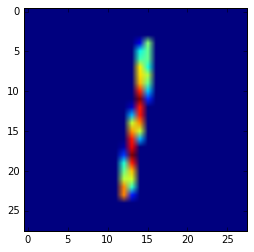

In [19]:
show_image(1997, trainlabels, traindata)

In [20]:
train_bar = np.concatenate((np.ones((traindata.shape[0], 1)), traindata), axis=1)
print(train_bar.shape)

(7052, 785)


In [124]:
def h(w, x):
    return np.sign(w.T @ x)

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

# perceptron + pocket algorithm + SGD
def perceptron(X, y, w_init):
    w = [w_init]
    eta = 1
    N = X.shape[1]
    dimen = X.shape[0]
    misclassified_points = []
    epoch = 0
    
    num_of_misclassified_points = 42000
    w_min = [w_init]
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape((dimen, 1))
            yi = y[0, mix_id[i]]
            if h(w[-1], xi) != yi: # misclassified points
                misclassified_points.append(mix_id[i])
                w_new = w[-1] + eta*yi*xi
                w.append(w_new)
                
        print(epoch, end=' ')
        epoch += 1
        if has_converged(X, y, w[-1]):
            break
        
        if len(misclassified_points) < num_of_misclassified_points:
            print('!!!')
            num_of_misclassified_points = len(misclassified_points)
            w_min = w[-1]
            
        misclassified_points = []
    
    return (w_min, misclassified_points)

dimen = traindata.shape[1]
w_init = np.random.randn(dimen, 1)
y = np.asmatrix(trainlabels)
print(y.shape)
(w, m) = perceptron(traindata.T, y, w_init)
print('Weight: ')
print(w.shape)
print('Misclassified points: ')
print(len(m))

(1, 7052)
0 !!!
1 !!!
2 !!!
3 !!!
4 5 !!!
6 !!!
7 Weight: 
(784, 1)
Misclassified points: 
2


In [125]:
w = np.array(w).reshape((dimen, 1))
m = np.array(m)
print(w.shape)
print(m.shape)

(784, 1)
(2,)


### Validate and calculate accuracy

In [126]:
def predict(w, x):
    return 0 if int(h(w, x)) < 0 else 1

def calc_validation_stats(labels, data, w):
    mis_validation_points = 0
#     print(labels.shape)
#     print(data.shape)
#     print(w.shape)
    for index in range(data.shape[0]):
#         clear_output()
        predicted_digit = predict(w, data[index:index+1].T)
        actual_digit = 0 if labels[0, index] < 0 else 1
        
#         print('Predicted Digit: ', predicted_digit)
#         print('Expected Digit: ', actual_digit)
#         show_image(index, labels, data)
#         plt.show()
#         time.sleep(1)
        
        if(predicted_digit != actual_digit):
            mis_validation_points += 1
            
        accuracy = mis_validation_points / labels.shape[1]
    
    return (mis_validation_points, accuracy)
    
(mis_validation_points, accuracy) = calc_validation_stats(validation_labels, validation_data, w)
print(mis_validation_points)
print('Accuracy: ', 100 - np.round(accuracy*100, 2), '%')

1
Accuracy:  99.94 %


### Test for test set

In [127]:
def show_test_image(index, data):
    samplerow = data[index:index+1]
    samplerow = np.reshape(samplerow,(28,28))
    plt.imshow(samplerow)

In [128]:
test_data = np.asmatrix(test.loc[:,:])
print(test_data.shape)

(28000, 784)


Predicted Digit:  0
Expected Digit: 


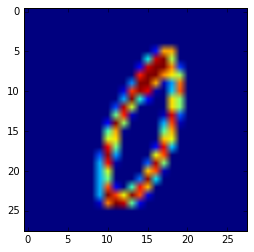

In [129]:
index = 1997
print('Predicted Digit: ', predict(w[:, -1:], test_data[index:index+1].T))
print('Expected Digit: ')
show_test_image(index, test_data)